# Joanie's modelling notebook

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
import pandas as pd
import statsmodels.api as sm 

In [2]:
print (sklearn.__version__)

1.0.2


## Reading in data and some light EDA

In [3]:
x = {1,2,3}
set(str(x))

{' ', ',', '1', '2', '3', '{', '}'}

In [4]:
## Reading in the data

train = pd.read_csv("../data/train_3.csv")
test = pd.read_csv("../data/test_3.csv")

In [5]:
pd.set_option('display.max_rows', None)
train.columns.to_list()

['Unnamed: 0',
 'tract_geoid',
 'All_Provider_Count',
 'MaxAdDown',
 'MaxAdUp',
 'Wired_Provider_Count',
 'Satellite_Provider_Count',
 'Fixed_Wireless_Provider_Count',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Fixed_Wireless_Provider_Count_25',
 'Wired_Provider_Count_25',
 'Satellite_Provider_Count_25',
 'Fixed_Wireless_Provider_Count_100',
 'Wired_Provider_Count_100',
 'Satellite_Provider_Count_100',
 'NAME',
 'median_age_overall',
 'median_age_male',
 'median_age_female',
 'state',
 'county',
 'tract',
 'employment_rate',
 'median_income',
 'total_households',
 'ave_household_size',
 'ave_family_size',
 'pct_health_ins_children',
 'pct_health_ins_19_64',
 'pct_health_ins_65+',
 'total_population',
 'median_house_value',
 'pct_white',
 'pct_hisp_latino',
 'pct_black',
 'pct_native',
 'pct_asian',
 'pct_hi_pi',
 'pct_other_race',
 'pct_two+_race',
 'pct_rent_burdened',
 'poverty_rate',
 'pct_pop_bachelors+',
 'pct_pop_hs+',
 'pct_internet',
 'pct_internet_dial_up',
 'pct_i

In [6]:
y_variable = 'pct_health_ins_19_64'

In [7]:
corr = train.corr()
health_ins_corr = corr[y_variable]

In [8]:
health_ins_corr.sort_values()

pct_only_smartphone                                                                         -0.564587
pct_pop_income_lt_50k                                                                       -0.530694
pct_hisp_latino                                                                             -0.488381
pct_internet_none                                                                           -0.484630
pct_pop_income_lt_30k                                                                       -0.467823
pct_computing_device_no_internet                                                            -0.467325
poverty_rate                                                                                -0.466293
pct_pop_ssi_households                                                                      -0.441692
DDI                                                                                         -0.441676
pct_only_cellular                                                                 

In [9]:
corr['pct_internet'].sort_values()

pct_internet_none                                                                           -0.965984
pct_no_computing_device                                                                     -0.881465
INFA                                                                                        -0.864397
DDI                                                                                         -0.853550
pct_computing_device_no_internet                                                            -0.809343
pct_pop_income_lt_50k                                                                       -0.780057
pct_pop_income_lt_30k                                                                       -0.778097
SE                                                                                          -0.665661
poverty_rate                                                                                -0.655268
pct_only_smartphone                                                               

In [69]:
## what are the most important broadband vars?
broadband_vars1 = ['pct_internet', 'pct_only_cellular', 'pct_computer_no_internet', 
                   'pct_internet_broadband_satellite', 'pct_computer_with_broadband']

broadband_vars2 = ['pct_internet', 'pct_computer', 'Ookla Median Download Speed (Mbps)', 
                  'pct_of_internet_users_with_broadband', 
                  'Wired_Provider_Count']

broadband_vars3 = ['pct_internet',  'pct_only_smartphone', 'pct_only_cellular', 
                   'Ookla Median Download Speed (Mbps)', 'Wired_Provider_Count_25']

broadband_vars = broadband_vars3



In [70]:
# covariates = [
#     'pct_white', 'median_age_overall', 'pct_hisp_latino', 'pct_pop_income_lt_50k', 'pct_only_cellular', 
#     'pct_pop_ssi_households', 'ave_family_size', 'pct_pop_income_gt_100k', 'pct_ages_lt_9', 'pct_black', 
#     'pct_pop_disability', 'pct_rent_burdened', 'log_median_income'
# ]

covariates = [
    'pct_white',  'pct_hisp_latino', 'pct_pop_income_lt_50k', 'pct_pop_income_gt_100k',
    'pct_pop_hs+', 'poverty_rate'
]

covariates = ['log_median_income', 'pct_hisp_latino', 'ruca_metro', 'ruca_micro', 'ruca_small_town', 'ruca_rural',
              'log_median_income_over_log_median_house', 
             'pct_pop_foreign_born', 'pct_pop_disability', 'median_income_over_median_rent']

In [71]:
all_vars = broadband_vars.copy()
all_vars.extend(covariates)
#all_vars = covariates

## linear regression

In [72]:
#Creating the model
model = LinearRegression()

In [73]:
train[all_vars].shape

(55826, 15)

In [74]:
train[y_variable].shape

(55826,)

In [75]:
train[y_variable].describe()

count    55826.000000
mean        87.358648
std          9.633049
min         20.000000
25%         82.800000
50%         89.900000
75%         94.400000
max        100.000000
Name: pct_health_ins_19_64, dtype: float64

In [76]:
print("all_vars =", all_vars)
model.fit(train[all_vars], train[y_variable])
predictions_train = model.predict(train[all_vars])

print("R^2 train: ",model.score(train[all_vars], train[y_variable]))
print("MSE train: ", mean_squared_error(train[y_variable], predictions_train))
print("RMSE train: ", mean_squared_error(train[y_variable], predictions_train)**.5)

all_vars = ['pct_internet', 'pct_only_smartphone', 'pct_only_cellular', 'Ookla Median Download Speed (Mbps)', 'Wired_Provider_Count_25', 'log_median_income', 'pct_hisp_latino', 'ruca_metro', 'ruca_micro', 'ruca_small_town', 'ruca_rural', 'log_median_income_over_log_median_house', 'pct_pop_foreign_born', 'pct_pop_disability', 'median_income_over_median_rent']
R^2 train:  0.5180775701557738
MSE train:  44.719497745049736
RMSE train:  6.687263845927551


In [77]:
predictions_test = model.predict(test[all_vars])
print("R^2 test: ",model.score(test[all_vars], test[y_variable]))
print("MSE test: ", mean_squared_error(test[y_variable], predictions_test))
print("RMSE test: ", mean_squared_error(test[y_variable], predictions_test)**.5)

R^2 test:  0.5282506279514725
MSE test:  44.61154902049494
RMSE test:  6.679187751552949


In [78]:
for i in model.coef_:
    print(i)
for i in model.feature_names_in_:
    print(i)

0.14559413803780355
-0.23546938167353731
-0.13766753023126707
0.006784144821135854
-0.16916895660580983
4.53847878033213
-0.13722266243039896
0.35930389534816576
0.20174998793664659
0.35897369037114196
-0.9200275736560104
-43.9020716702568
-0.1087338826088243
0.13528801361908174
0.021366533029811736
pct_internet
pct_only_smartphone
pct_only_cellular
Ookla Median Download Speed (Mbps)
Wired_Provider_Count_25
log_median_income
pct_hisp_latino
ruca_metro
ruca_micro
ruca_small_town
ruca_rural
log_median_income_over_log_median_house
pct_pop_foreign_born
pct_pop_disability
median_income_over_median_rent


(array([5.0000e+00, 7.0000e+01, 4.0000e+02, 1.2350e+03, 2.7600e+03,
        6.4020e+03, 1.3938e+04, 1.9607e+04, 1.0664e+04, 7.4500e+02]),
 array([ 49.27322043,  54.74628532,  60.2193502 ,  65.69241509,
         71.16547997,  76.63854486,  82.11160974,  87.58467463,
         93.05773951,  98.5308044 , 104.00386928]),
 <BarContainer object of 10 artists>)

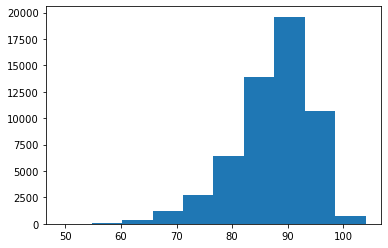

In [68]:
plt.hist(predictions_train)

(array([7.0000e+00, 2.9000e+01, 9.3000e+01, 2.7800e+02, 6.6500e+02,
        1.5620e+03, 3.9390e+03, 9.1490e+03, 1.8239e+04, 2.1865e+04]),
 array([ 20.,  28.,  36.,  44.,  52.,  60.,  68.,  76.,  84.,  92., 100.]),
 <BarContainer object of 10 artists>)

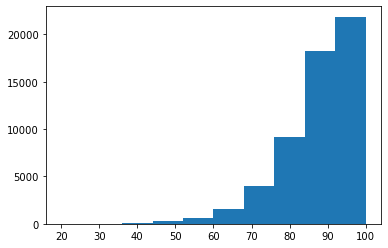

In [35]:
plt.hist(train[y_variable])

In [36]:
import pickle

with open('linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)

## random forest

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [96]:
y_train = train[y_variable]
X_train = train.drop(columns=[y_variable])

y_test = test[y_variable]
X_test = test.drop(columns=[y_variable])

In [97]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

In [98]:
regr.fit(X_train[all_vars], y_train)

predictions_train = regr.predict(train[all_vars])

print("R^2 train: ",regr.score(train[all_vars], train[y_variable]))
print("MSE train: ", mean_squared_error(train[y_variable], predictions_train))
print("RMSE train: ", mean_squared_error(train[y_variable], predictions_train)**.5)

R^2 train:  0.7127795397951079
MSE train:  27.319015644663484
RMSE train:  5.226759574025142


In [99]:
predictions_test = regr.predict(test[all_vars])
print("R^2 test: ",regr.score(test[all_vars], test[y_variable]))
print("MSE test: ", mean_squared_error(test[y_variable], predictions_test))
print("RMSE test: ", mean_squared_error(test[y_variable], predictions_test)**.5)

R^2 test:  0.6189362551269902
MSE test:  36.234679800872684
RMSE test:  6.019524881655751


In [100]:
regr.n_features_in_

24

In [104]:
regr.feature_importances_

array([0.019585  , 0.00673392, 0.01896283, 0.003399  , 0.00231294,
       0.01479682, 0.03189055, 0.00583861, 0.0064152 , 0.04654548,
       0.4043445 , 0.00556714, 0.01252766, 0.24288548, 0.0071102 ,
       0.02649614, 0.00892565, 0.02973795, 0.02550069, 0.0088353 ,
       0.01119851, 0.02445672, 0.01133262, 0.02460111])

In [103]:
np.array(all_vars)[regr.feature_importances_>.1]

array(['interaction_high_income_internet', 'pct_hisp_latino'],
      dtype='<U34')

In [80]:
all_vars = float_vars

In [79]:
float_vars = train.dtypes[train.dtypes!=object].index.to_list()

for i in ['tract_geoid', 'pct_health_ins_children',
 'pct_health_ins_19_64',
 'pct_health_ins_65+', 'state',
 'county',
 'tract', 'em']:
    float_vars.remove(i)
    
float_vars

['All_Provider_Count',
 'MaxAdDown',
 'MaxAdUp',
 'Wired_Provider_Count',
 'Satellite_Provider_Count',
 'Fixed_Wireless_Provider_Count',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Fixed_Wireless_Provider_Count_25',
 'Wired_Provider_Count_25',
 'Satellite_Provider_Count_25',
 'Fixed_Wireless_Provider_Count_100',
 'Wired_Provider_Count_100',
 'Satellite_Provider_Count_100',
 'median_age_overall',
 'median_age_male',
 'median_age_female',
 'employment_rate',
 'median_income',
 'total_households',
 'ave_household_size',
 'ave_family_size',
 'total_population',
 'median_house_value',
 'pct_white',
 'pct_hisp_latino',
 'pct_black',
 'pct_native',
 'pct_asian',
 'pct_hi_pi',
 'pct_other_race',
 'pct_two+_race',
 'pct_rent_burdened',
 'poverty_rate',
 'pct_pop_bachelors+',
 'pct_pop_hs+',
 'pct_internet',
 'pct_internet_dial_up',
 'pct_internet_broadband_any_type',
 'pct_internet_cellular',
 'pct_only_cellular',
 'pct_internet_broadband_fiber',
 'pct_internet_broadband_satellite',


## XGBoost

In [67]:
import xgboost as xgb